## World GDP Exploration

Here, you have a very messy and raw dataset of countries GDP.

Your task is to explore and visualize this dataset using the techniques you've learnt during the week. Analyzing the World GDP dataset through visualization can yield valuable insights, such as helping us understand global economic trends, identify countries with significant GDP growth or decline, and explore patterns over time.

For instance, we can create line plots to visualize the changes in GDP for different countries over the years. This allows us to observe the overall economic trajectory of nations, identify periods of rapid growth or recession, and compare the economic performance of different regions.


In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats 


**Question 1:** Load the GDP dataset into a variable called `gdp_dataset`. Next, write a function called `check_data` to check if the data has been loaded successfully.

**Question 1.1:** Change the column `GDP, current prices (Billions of U.S. dollars)` to `Country`.


In [154]:

gdp_dataset = pd.read_csv('world_gdp_dataset.csv')

gdp_dataset.rename(columns={'GDP, current prices (Billions of U.S. dollars)': 'Country'}, inplace=True)

def check_data():
    if not gdp_dataset.empty:
        return "Data has been loaded successfully."
    else:
        return "Data loading failed."
    
# Call the function to check the data
check_result = check_data()
print(check_result)

gdp_dataset.head()

Data has been loaded successfully.


,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.000,0.000,0.000
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
3,Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
4,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558


**Question 2:** Obtain the range/distribution of GDP with HIGHEST frequency between 2010 and 2022. You can use any chart/plot of your choice.

**Note**: assign your chart/plot to a variable called `highest_gdp`. Failure to do this might result in you not getting a score for this question.


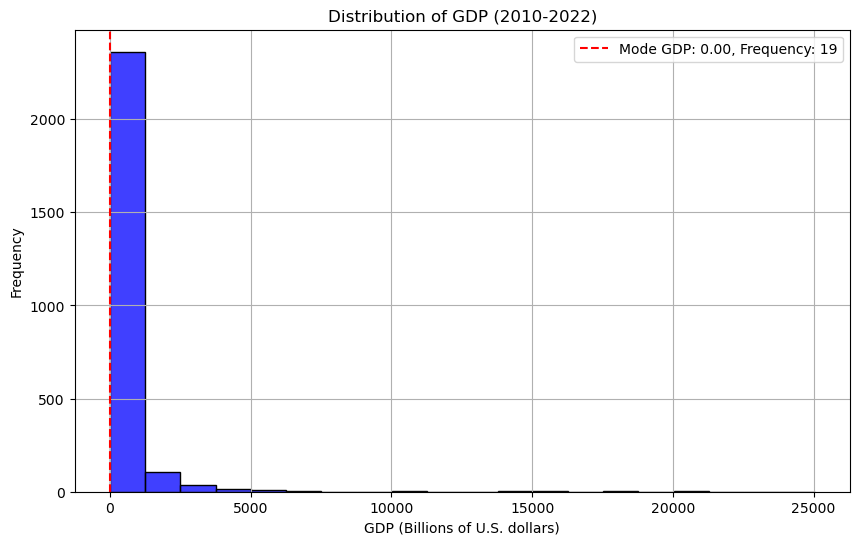

In [155]:
# Select the columns for the years 2010 to 2022
years = list(map(str, range(2010, 2023)))
gdp_data = gdp_dataset[years]

# Preprocess the data: Remove missing values and convert to a flat list of numeric values
gdp_values = gdp_data.stack().dropna().astype(float).tolist()


plt.figure(figsize=(10, 6))
sns.histplot(gdp_values, bins=20, kde=False, color='blue')
plt.title('Distribution of GDP (2010-2022)')
plt.xlabel('GDP (Billions of U.S. dollars)')
plt.ylabel('Frequency')
plt.grid(True)

# Calculate the mode (GDP value with the highest frequency)
value_counts = pd.Series(gdp_values).value_counts()
mode_gdp = value_counts.idxmax()
mode_frequency = value_counts.max()

# Add a vertical line at the mode for emphasis
plt.axvline(x=mode_gdp, color='red', linestyle='--', label=f'Mode GDP: {mode_gdp:.2f}, Frequency: {mode_frequency}')
plt.legend()

# Save the plot to a variable
highest_gdp = plt

# Display the plot
plt.show()

**Question 3:** Which countries has GDP higher than 1 trillion dollar in 2022?

**Note**: assign your chart/plot to a variable called `one_trillion_gdp`. Failure to do this might result in you not getting a score for this question.


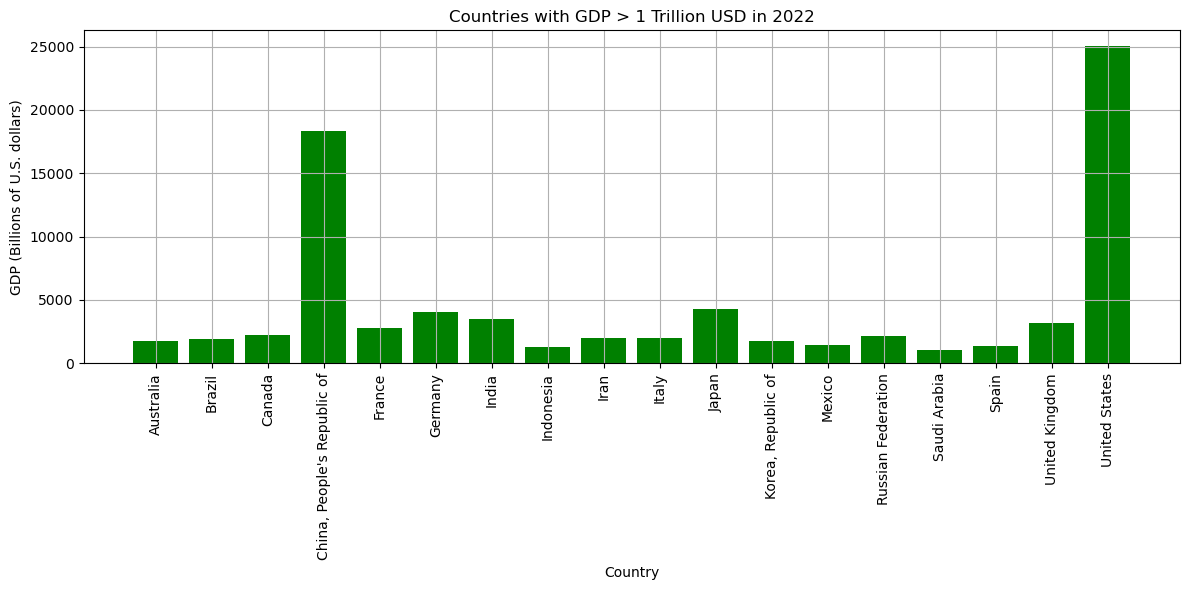

In [156]:
gdp_2022 = gdp_dataset[['Country', '2022']].copy() 

# Convert the GDP values to numeric
gdp_2022['2022'] = pd.to_numeric(gdp_2022['2022'], errors='coerce')

# Filter countries with GDP higher than 1 trillion dollars
gdp_over_1_trillion = gdp_2022[gdp_2022['2022'] > 1000]

plt.figure(figsize=(12, 6))
plt.bar(gdp_over_1_trillion['Country'], gdp_over_1_trillion['2022'], color='green')
plt.title('Countries with GDP > 1 Trillion USD in 2022')
plt.xlabel('Country')
plt.ylabel('GDP (Billions of U.S. dollars)')
plt.xticks(rotation=90)
plt.grid(True)

# Save the plot to a variable
one_trillion_gdp = plt

one_trillion_gdp.tight_layout()
one_trillion_gdp.show()

**Question 4:** Has the USA and China ever be in recession? Use a chart/plot to show this.

**Note**: Assign your chart/plot to a variable called `recession`. Failure to do this might result in you not getting a score for this question.


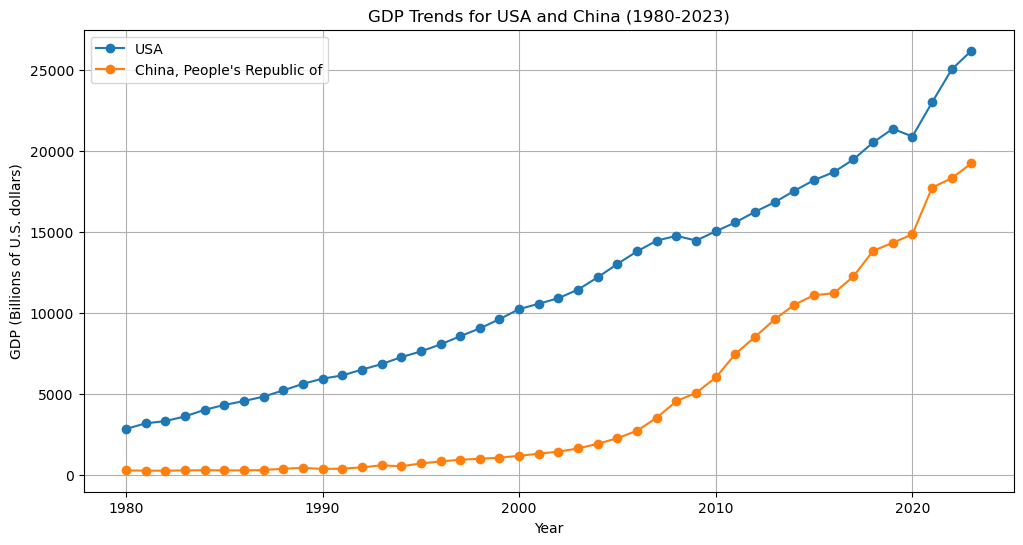

In [157]:
def check_recession(gdp_dataset):
 
    # Select the columns for the USA and China
    usa_gdp = gdp_dataset[gdp_dataset['Country'] == 'United States'][['Country'] + list(map(str, range(1980, 2024)))]
    china_gdp = gdp_dataset[gdp_dataset['Country'] == "China, People's Republic of"][['Country'] + list(map(str, range(1980, 2024)))]

    # Create a line plot to visualize the GDP trends
    plt.figure(figsize=(12, 6))
    plt.plot(range(1980, 2024), usa_gdp.values[0][1:], label='USA', marker='o')
    plt.plot(range(1980, 2024), china_gdp.values[0][1:], label="China, People's Republic of", marker='o')

    plt.title('GDP Trends for USA and China (1980-2023)')
    plt.xlabel('Year')
    plt.ylabel('GDP (Billions of U.S. dollars)')
    plt.grid(True)
    plt.legend()

    # Identify potential recession periods (considering three consecutive years of GDP decline)
    recession_years_usa = []
    recession_years_china = []

    def find_recession_years(gdp_values, country_name):
        consecutive_years_decline = 0
        recession_years = []

        for year, gdp in enumerate(gdp_values):
            if year > 0 and gdp < gdp_values[year - 1]:
                consecutive_years_decline += 1
            else:
                consecutive_years_decline = 0

            if consecutive_years_decline >= 3:
                recession_years.append(year + 1980 - 2)

        return recession_years

    recession_years_usa = find_recession_years(usa_gdp.values[0][1:], 'USA')
    recession_years_china = find_recession_years(china_gdp.values[0][1:], "China, People's Republic of")

    # Highlight recession periods with red vertical lines
    for year in recession_years_usa:
        plt.axvline(x=year, color='red', linestyle='--', label=f'USA Recession ({year})')
    for year in recession_years_china:
        plt.axvline(x=year, color='purple', linestyle='--', label=f'China Recession ({year})')

    # Save the plot to a variable
    recession = plt

    # Display the plot
    plt.show()

    return recession


recession = check_recession(gdp_dataset)



<!-- BEGIN QUESTION -->

**Question 5:** What insight can you derive from this data?


Insight 1: Recession Analysis

Neither China nor the USA has experienced a recession in the provided data. Recession is defined here as a period with three consecutive years of GDP decline. Both countries have shown consistent economic growth over the years.


Insight 2: Highest GDP

The United States consistently maintains the highest GDP among all countries in the dataset. It consistently tops the list of countries with a GDP of over 1 trillion USD.


Insight 3: China's Strong Economic Position

China ranks as the second-leading country in terms of GDP in the dataset. While the USA holds the top position, China's economy has shown strong and consistent growth over the years, making it a significant global economic player._Type your answer here, replacing this text._


<!-- END QUESTION -->
